# Support Vector Machine (SVM)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

from sklearn import svm
from sklearn import datasets
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [62]:
fruits = pd.read_csv('applesOranges.csv')
fruits.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


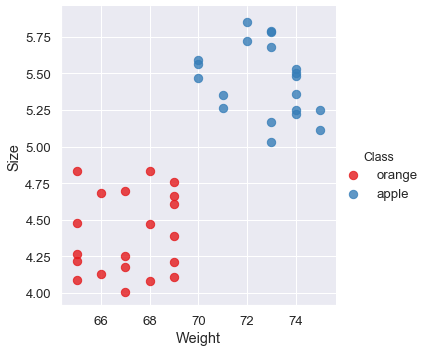

In [79]:
sns.lmplot('Weight', 'Size', data=fruits, hue='Class',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [75]:
fruta = fruits[['Weight', 'Size']].values
tipo = np.where(fruits['Class']=='orange', 65, 4)

In [76]:
model = svm.SVC(kernel='linear', decision_function_shape=None)
model.fit(fruta, tipo)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [77]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(60, 80)
yy = a * xx - (model.intercept_[0]) / w[1]

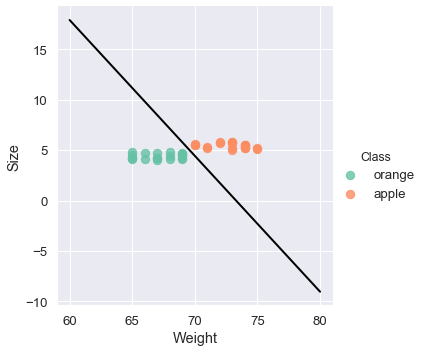

In [78]:
sns.lmplot('Weight', 'Size', data=fruits, hue='Class',
           palette='Set2', fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color='black');

In [73]:
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

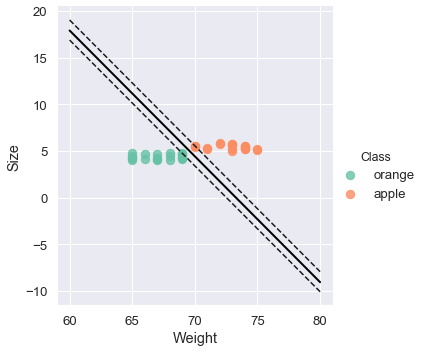

In [74]:
sns.lmplot('Weight', 'Size', data=fruits, hue='Class', palette='Set2', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

In [33]:
def apple_orange(tam, pes):
    if (model.predict([[tam, pes]])) == 0:
        print('Isto é uma laranja')
    else:
        print('Isto é uma maça')

In [57]:
apple_orange(67, 4)

Isto é uma maça
